In [15]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import talib
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import csv
import time
plt.rcParams['font.family']='SimHei' # 顯示中文('SimHei' for MacOS)
from sklearn import preprocessing

'''today = date.today()
print(today.strftime("%Y%m%d"))'''

fina=input('輸入個股代碼(ex:1101)：')
#date=input('輸入日期(ex:2018/10/01)：')
date="2010/01/01"
inday=datetime.datetime.strptime(date,"%Y/%m/%d")
inday=datetime.datetime.strptime(inday.strftime('%Y/%m/'+'01'),"%Y/%m/%d")
ago=[(inday+relativedelta(months=+i)).strftime('%Y%m%d') for i in range(109) ]
ago

輸入個股代碼(ex:1101)：0050


['20100101',
 '20100201',
 '20100301',
 '20100401',
 '20100501',
 '20100601',
 '20100701',
 '20100801',
 '20100901',
 '20101001',
 '20101101',
 '20101201',
 '20110101',
 '20110201',
 '20110301',
 '20110401',
 '20110501',
 '20110601',
 '20110701',
 '20110801',
 '20110901',
 '20111001',
 '20111101',
 '20111201',
 '20120101',
 '20120201',
 '20120301',
 '20120401',
 '20120501',
 '20120601',
 '20120701',
 '20120801',
 '20120901',
 '20121001',
 '20121101',
 '20121201',
 '20130101',
 '20130201',
 '20130301',
 '20130401',
 '20130501',
 '20130601',
 '20130701',
 '20130801',
 '20130901',
 '20131001',
 '20131101',
 '20131201',
 '20140101',
 '20140201',
 '20140301',
 '20140401',
 '20140501',
 '20140601',
 '20140701',
 '20140801',
 '20140901',
 '20141001',
 '20141101',
 '20141201',
 '20150101',
 '20150201',
 '20150301',
 '20150401',
 '20150501',
 '20150601',
 '20150701',
 '20150801',
 '20150901',
 '20151001',
 '20151101',
 '20151201',
 '20160101',
 '20160201',
 '20160301',
 '20160401',
 '20160501',

In [18]:
month = ago[0]
data = {
    'response':'json',
    'date': month,
    'stockNo':fina,
}
dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
result = json.loads(dres.text)
df1 = pd.DataFrame(result['data'])
df1.columns = result['fields']
print(month)
time.sleep(3)

for month in ago[1:109] :
    data = {
        'response':'json',
        'date': month,
        'stockNo':fina,
    }
    dres = requests.get('https://www.twse.com.tw/exchangeReport/STOCK_DAY?', params=data)
    result = json.loads(dres.text)
    tmp = pd.DataFrame(result['data'])
    tmp.columns = result['fields']
    df1=df1.append(tmp).reset_index(drop=True)
    print(month)
    time.sleep(3)

df1['開盤價']=df1['開盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最高價']=df1['最高價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['最低價']=df1['最低價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['收盤價']=df1['收盤價'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交股數']=df1['成交股數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交金額']=df1['成交金額'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['成交筆數']=df1['成交筆數'].str.replace(',','').astype(dtype=float,errors='ignore')
df1['漲跌價差']=df1['漲跌價差'].str.replace('+','')
df1['漲跌價差']=df1['漲跌價差'].str.replace('X','').astype(dtype=float,errors='ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
indexNames = df1[ df1['成交金額'] == 0 ].index
df1 = df1.drop(indexNames)
df1=df1.reset_index(drop=True)
df1.to_json('Tw50.json')
df1

20100101
20100201
20100301
20100401
20100501
20100601
20100701
20100801
20100901
20101001
20101101
20101201
20110101
20110201
20110301
20110401
20110501
20110601
20110701
20110801
20110901
20111001
20111101
20111201
20120101
20120201
20120301
20120401
20120501
20120601
20120701
20120801
20120901
20121001
20121101
20121201
20130101
20130201
20130301
20130401
20130501
20130601
20130701
20130801
20130901
20131001
20131101
20131201
20140101
20140201
20140301
20140401
20140501
20140601
20140701
20140801
20140901
20141001
20141101
20141201
20150101
20150201
20150301
20150401
20150501
20150601
20150701
20150801
20150901
20151001
20151101
20151201
20160101
20160201
20160301
20160401
20160501
20160601
20160701
20160801
20160901
20161001
20161101
20161201
20170101
20170201
20170301
20170401
20170501
20170601
20170701
20170801
20170901
20171001
20171101
20171201
20180101
20180201
20180301
20180401
20180501
20180601
20180701
20180801
20180901
20181001
20181101
20181201


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,99/01/04,20083125.0,1.132155e+09,56.45,56.65,56.05,56.50,0.05,1624.0
1,99/01/05,16453854.0,9.320154e+08,56.80,56.90,56.15,56.50,0.00,1866.0
2,99/01/06,19012172.0,1.087144e+09,56.50,57.75,56.50,57.55,1.05,2958.0
3,99/01/07,14110575.0,8.143443e+08,57.60,58.15,57.30,57.40,-0.15,1846.0
4,99/01/08,11342752.0,6.518310e+08,57.30,57.75,57.05,57.75,0.35,1493.0
5,99/01/11,11581081.0,6.700256e+08,57.10,58.05,57.10,57.90,0.15,1636.0
6,99/01/12,7306217.0,4.204735e+08,57.55,57.85,57.25,57.60,-0.30,1329.0
7,99/01/13,16686518.0,9.489870e+08,57.05,57.15,56.70,56.75,-0.85,2021.0
8,99/01/14,9978365.0,5.704065e+08,56.80,57.60,56.80,57.45,0.70,1208.0
9,99/01/15,8425543.0,4.857438e+08,57.35,57.95,57.35,57.80,0.35,1020.0


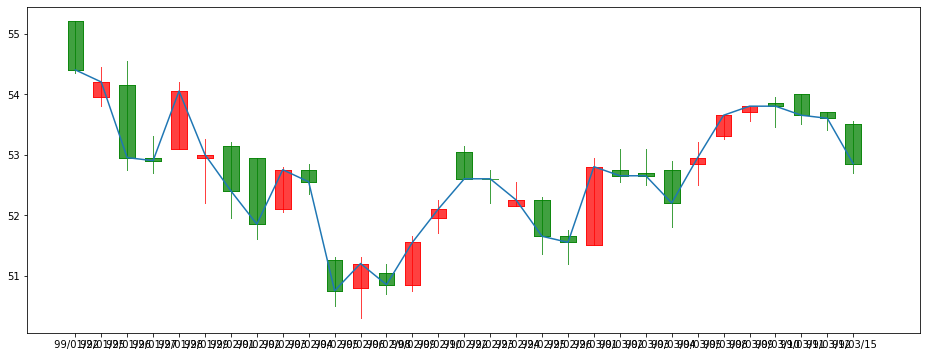

In [20]:

df3 = df1
df3=df3.drop(range(31,len(df3)))


fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df3['日期']), 1))
ax.set_xticklabels(df3['日期'][::1])
mpf.candlestick2_ochl(ax, df3['開盤價'], df3['收盤價'], df3['最高價'],df3['最低價'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.plot(df3['收盤價'])
